## Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import plotly

## Cargamos los csv

In [2]:
df_rt = pd.read_csv("tweets_by_rt.csv")
df_lang = pd.read_csv("tweets_by_lang.csv")
df_hashtags = pd.read_csv("hashtags_freq.csv")
df_emojis = pd.read_csv("emojis_freq.csv")

----

## Creamos una tabla por categoria de numero de retweets para el gráfico de Flourish

In [4]:
# Definir los límites de las categorías
bins = [x for x in range(0, 110, 10)] + [float('inf')]

# Definir los nombres de las categorías
labels = [f'{x}-{x+9}' if x < 100 else "> 100" for x in bins[:-1]]

# Asignar la categoría a cada fila
df_rt['retweet_category'] = pd.cut(df_rt['retweet_number'], bins=bins, labels=labels, right=False)

# Verificar los resultados
df_rt[70:80]

,retweet_number,count,retweet_category
70,82,4,80-89
71,84,2,80-89
72,90,3,90-99
73,91,1,90-99
74,92,4,90-99
75,93,3,90-99
76,96,2,90-99
77,97,1,90-99
78,98,5,90-99
79,102,2,> 100


In [16]:
#creamos un df solo con las columnas que necesitamos
df_rt_cat = df_rt[['count', 'retweet_category']]

In [17]:
df_rt_cat

,count,retweet_category
0,102183,0-9
1,9172,0-9
2,2507,0-9
3,1179,0-9
4,711,0-9
...,...,...
152,1,> 100
153,2,> 100
154,1,> 100
155,1,> 100


In [8]:
# Crear un nuevo DataFrame con la categoría y el total de count
df_rt_cat = df_rt.groupby('retweet_category')['count'].sum().reset_index()

# Verificar los resultados
df_rt_cat

,retweet_category,count
0,0-9,116996
1,10-19,553
2,20-29,169
3,30-39,90
4,40-49,57
5,50-59,36
6,60-69,18
7,70-79,8
8,80-89,8
9,90-99,19


In [21]:
#guardamos la tabla en un csv
df_rt_cat.to_csv('tweets_rt_cat.csv', index=False)

----

## Modificar la tabla de idiomas para hacer el gráfico en Flourish

In [79]:
# Excluir la categoría 'es' y obtener las 5 categorías siguientes con mayor valor de 'count'
categorias_filtradas = df_lang[df_lang['lang'] != 'es']

# Ordenar las categorías por frecuencia de forma descendente
categorias_ordenadas = categorias_filtradas.sort_values('count', ascending=False)
categorias_ordenadas = categorias_ordenadas.head(5)

In [80]:
categorias_ordenadas

,lang,count
3,ca,5801
8,en,2276
29,qme,1498
39,zxx,1110
26,pt,668


In [33]:
# Calcular la suma total de la columna 'count'
count_total = df_lang['count'].sum()

# Calcular la columna 'count' cuando 'lang' es igual a 'es'
count_es = int(df_lang[df_lang['lang'] == 'es']['count'])

# Calcular el porcentaje
porcentaje_es = (count_es / count_total) * 100

# Imprimir el porcentaje
print(f"Porcentaje de 'count' cuando 'lang' es igual a 'es': {porcentaje_es:.2f}%")

Porcentaje de 'count' cuando 'lang' es igual a 'es': 88.50%


-----

## Crear nube de palabras de los hashtags mas frecuentes

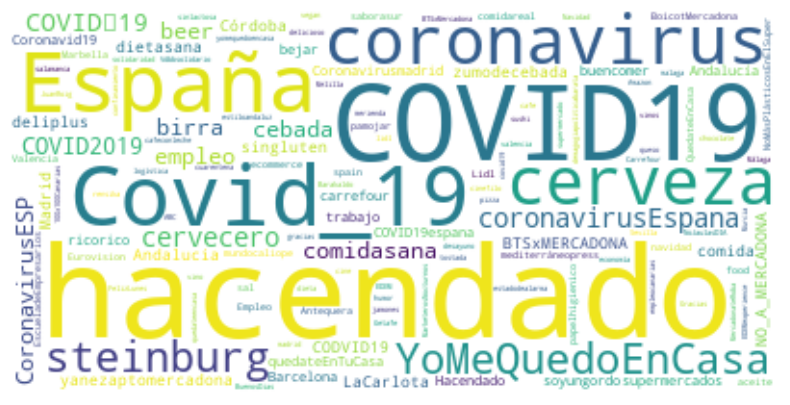

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crear un diccionario de hashtags y su frecuencia
hashtags_freq = dict(zip(df_hashtags['all_hashtags'], df_hashtags['Freq']))

# Excluir los hashtags 'Mercadona' y 'mercadona'
hashtags_freq = {k: v for k, v in hashtags_freq.items() if k.lower() not in ['mercadona']}

# Ordenar el diccionario por frecuencia en orden descendente
hashtags_freq = dict(sorted(hashtags_freq.items(), key=lambda x: x[1], reverse=True))

# Obtener los hashtags principales
top_hashtags = dict(list(hashtags_freq.items())[:200])
#top_hashtags = dict(list(hashtags_freq.items()))

# Crear el objeto WordCloud
wordcloud = WordCloud(background_color='white').generate_from_frequencies(top_hashtags)

# Mostrar el wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()